# One pagers
## Load data

In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../src')
import util
from config import *
import plots
import ipynbname
from study_gen import study
df = study.df # pandas dataframe

## Create a one-pager for a construct

In [ ]:
def get_avg_pearson_score_for_construct_in_family(study, sample, construct, section):
    family = util.family_from_construct(construct)
    data = plots.sample_replicates_heatmap_per_family(study, [sample,sample], family, section)['data']
    score = data[construct].loc[~data.index.str.contains(construct)].mean()
    return '{:.2f}'.format(score)

In [ ]:
%reload_ext autoreload
###############
# Parameters
###############
sample = 'lauren470_S1'
construct = '3042-O-flank_1=hp1-DB'
family = util.family_from_construct(construct)
###############

# Get data
data = study.get_df(sample=sample, section='ROI', construct=construct)
assert len(data) <= 1, 'More than one sequence found for {} - {}'.format(sample, construct)
assert len(data) > 0, 'No sequence found for {} - {}'.format(sample, construct)
data = data.iloc[0]

# Construct info
construct = construct
sequence = data['sequence']
type = 'Canonical base pair'
gc_content = '{:.2f}%'.format(100*np.array([base in ['G','C'] for base in sequence]).mean())
print('Construct info \n--------------')
print('Construct: {}'.format(construct))
print('Sequence: {}'.format(sequence))
print('Type: {}'.format(type))
print('GC content: {}'.format(gc_content))
print('')

# Sample info
library = 'TODO' # should be in samples.csv
exp_env = data['exp_env']
exp_env_name = 'cell_line' if exp_env == 'in_vivo' else 'buffer'
exp_env_var = data['cell_line'] if exp_env == 'in_vivo' else data['buffer']
DMS = data['DMS_conc_mM']
reaction_time = data['inc_time_tot_secs']
deltaG = data['deltaG']

print('Sample info \n-----------')
print('Library: {}'.format(library))
print('Cell line: {}'.format(exp_env_var)) if exp_env == 'in_vivo' else print('Buffer: {}'.format(exp_env_var))
print('DMS concentration: {} mM'.format(DMS))
print('Reaction time: {} secs'.format(reaction_time))
print('DeltaG: {}'.format(deltaG))
print('')

# Quality control
num_reads = data['num_aligned']
pearson_R_5_hp = get_avg_pearson_score_for_construct_in_family(study, sample, construct, 'MS2')
pearson_R_3_hp = get_avg_pearson_score_for_construct_in_family(study, sample, construct, 'LAH')
print('Quality control \n---------------')
print('Number of reads: {}'.format(num_reads))
print('Pearson R 5 hp: {}'.format(pearson_R_5_hp))
print('Pearson R 3 hp: {}'.format(pearson_R_3_hp))
print('')

## Plots
figs = {}
figs['read_coverage_per_position'] = plots.read_coverage_per_position(study, sample, construct)['fig']
figs['mutation_fraction_at_each_position'] = plots.mutation_fraction_at_each_position(study, sample, construct)['fig']
figs['mutation_identity_at_each_position'] = plots.mutation_identity_at_each_position(study, sample, construct)['fig']
figs['mutation_per_read_per_construct'] = plots.mutation_per_read_per_construct(study, sample, construct)['fig']
for fig_name, fig in figs.items():
    util.save_plotly_fig(ipynbname.path(), fig_name, fig, format='png')
    fig.show()


## Export to PNG

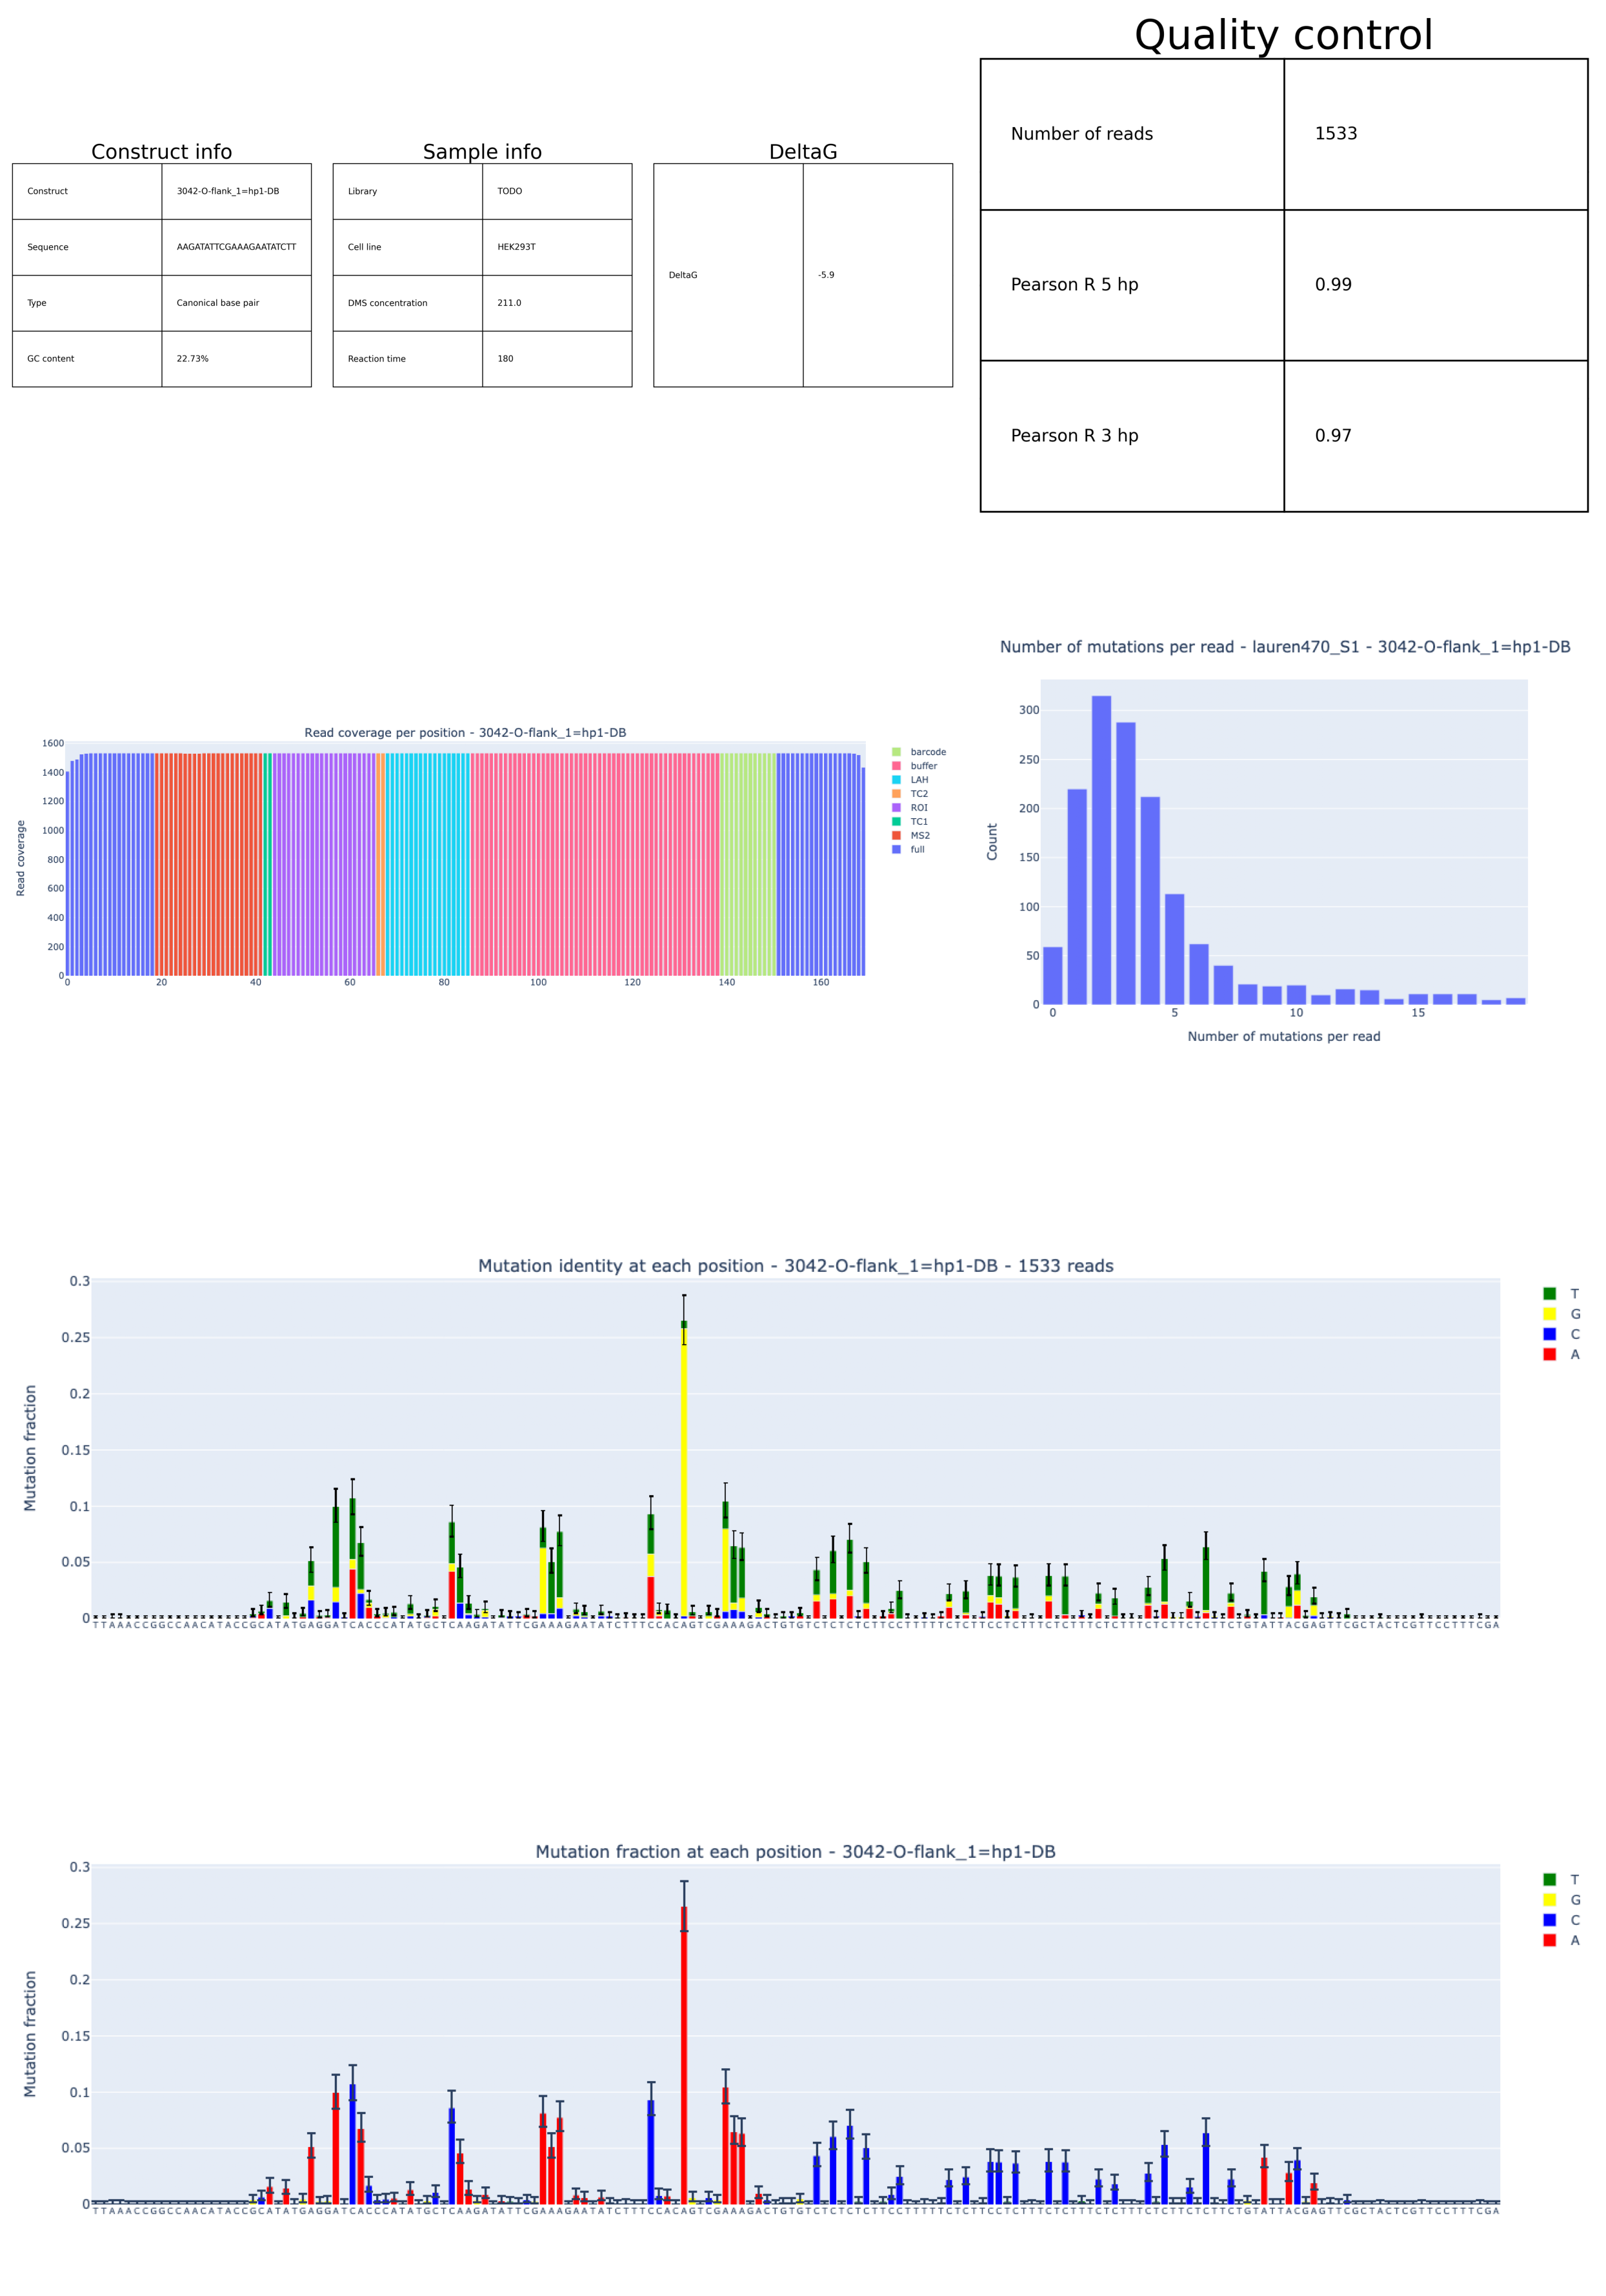

<Figure size 640x480 with 0 Axes>

In [141]:
# concatenate all plots into one figure 
import matplotlib.pyplot as plt

cwd = os.getcwd()
path = os.path.abspath(os.path.join(cwd, '../../figs', cwd.split('/')[-1].split('-')[0], ipynbname.name().split('-')[0]))
images = {  }
for figname, fig in figs.items():
    images[figname] = plt.imread(os.path.join(path, version + '-' + figname + '.png'))
    

# plot using the following structure
# 1 2 
# 3
# 4
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)
        


plot_to_letter = {
    'read_coverage_per_position': 'A',
    'mutation_fraction_at_each_position': 'D',
    'mutation_identity_at_each_position': 'C',
    'mutation_per_read_per_construct': 'B'}



plt.table(
    cellText=[['Construct', construct],
                ['Sequence', sequence],
                ['Type', type],
                ['GC content', gc_content],],
    cellLoc='left',
    loc='bottom',
    bbox=[0, 0, 1, 1])
plt.title('Construct info', fontsize=24)
plt.axis('off')
plt.savefig(os.path.join(path, version + '-construct_info.png'), dpi=300, bbox_inches='tight')
plot_to_letter['construct_info'] = 'K'
images['construct_info'] = plt.imread(os.path.join(path, version + '-construct_info.png'))

plt.table(
    cellText=[['Library', library],
                ['Cell line', exp_env_var] if exp_env == 'in_vivo' else ['Buffer', exp_env_var],
                ['DMS concentration', DMS],
                ['Reaction time', reaction_time]],
    cellLoc='left',
    loc='bottom',
    bbox=[0, 0, 1, 1])
plt.title('Sample info', fontsize=24)
plt.axis('off')
plt.savefig(os.path.join(path, version + '-sample_info.png'), dpi=300, bbox_inches='tight')
plot_to_letter['sample_info'] = 'M'
images['sample_info'] = plt.imread(os.path.join(path, version + '-sample_info.png'))

plt.table(
    cellText=[['DeltaG', deltaG]],
    cellLoc='left',
    loc='bottom',
    bbox=[0, 0, 1, 1])
plt.title('DeltaG', fontsize=24)
plt.axis('off')
plt.savefig(os.path.join(path, version + '-deltaG.png'), dpi=300, bbox_inches='tight')
plot_to_letter['deltaG'] = 'N'
images['deltaG'] = plt.imread(os.path.join(path, version + '-deltaG.png'))


# plot quality control
# plot a balck circle with the score written in white inside

plt.axis('off')
plt.title('Quality control', fontsize=24)
plt.table(
    cellText=[['Number of reads', num_reads],
                ['Pearson R 5 hp', pearson_R_5_hp],
                ['Pearson R 3 hp', pearson_R_3_hp],],
    cellLoc='left',
    loc='bottom',
    bbox=[0, 0, 1, 1])
plt.savefig(os.path.join(path, version + '-quality_control.png'), dpi=300, bbox_inches='tight')
plot_to_letter['quality_control'] = 'L'
images['quality_control'] = plt.imread(os.path.join(path, version + '-quality_control.png'))
plt.close()

axd = plt.figure(constrained_layout=True, figsize=(25,40)).subplot_mosaic(
    """
    KMNLL
    AAABB
    CCCCC
    DDDDD
    """
)    

for (figname, fig) in images.items():
    axd[plot_to_letter[figname]].imshow(images[figname])
    axd[plot_to_letter[figname]].axis('off')
    plt.tight_layout()
plt.show()
plt.tight_layout()
